In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset = pd.read_csv('USA_Housing.csv')
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Data Preprocessing Part
## part 1 : Handling missing value

In [4]:
dataset.isnull().sum()/len(dataset)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

# imputation method

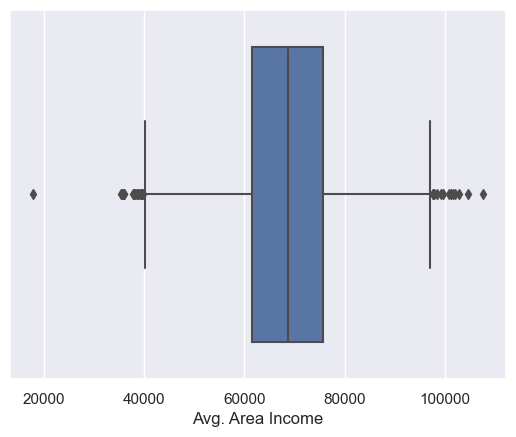

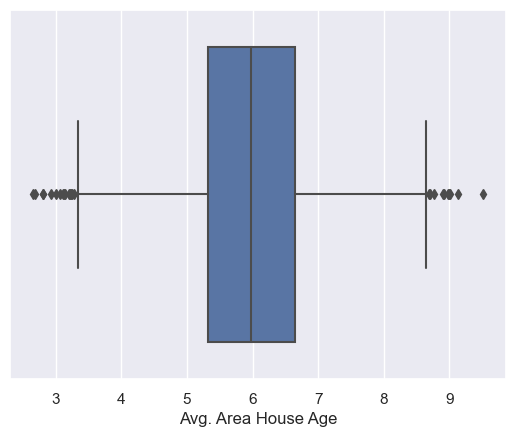

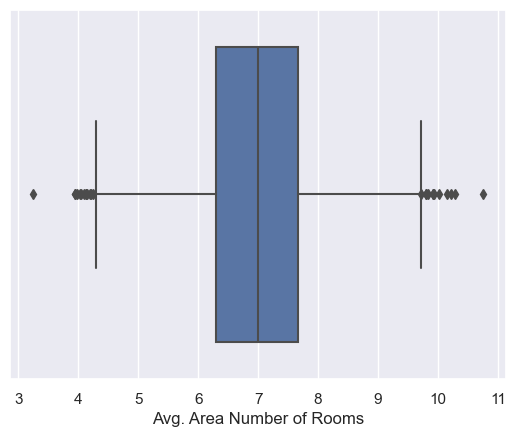

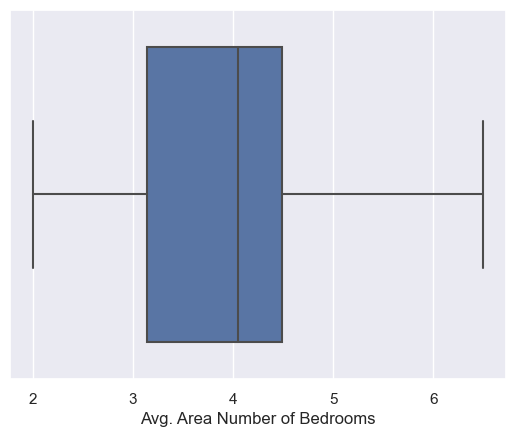

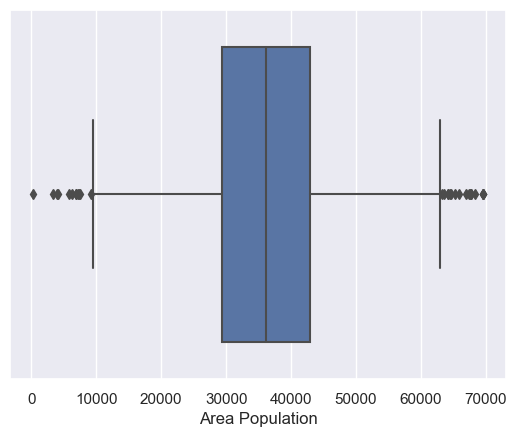

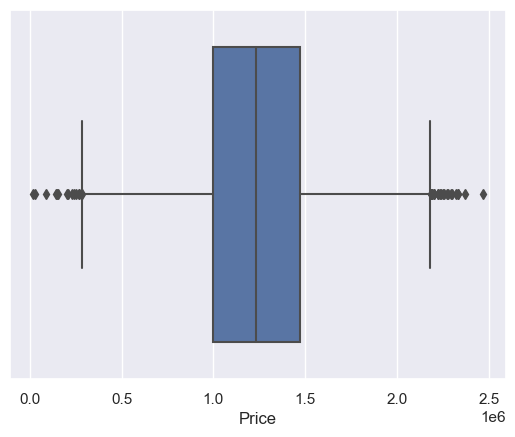

In [5]:
# check outlier
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [6]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
dataset['Avg. Area Income'] = dataset['Avg. Area Income'].fillna(dataset['Avg. Area Income'].median())

In [9]:
dataset['Avg. Area Number of Rooms'] = dataset['Avg. Area Number of Rooms'].fillna(dataset['Avg. Area Number of Rooms'].median())

In [10]:
dataset['Avg. Area Number of Bedrooms'] = dataset['Avg. '].fillna(dataset['Av'].mean())

In [11]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Part 2 - Encoding method

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [13]:
dataset['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [14]:
dataset['Address'][1]

'188 Johnson Views Suite 079\nLake Kathleen, CA 48958'

In [16]:
dataset['Address'] = dataset['Address'].astype('category')
dataset['Address'] = dataset['Address'].cat.codes


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int16  
dtypes: float64(6), int16(1)
memory usage: 244.3 KB


In [18]:
dataset['Address'].nunique()

5000

In [19]:
dataset['Address'][0]

962

In [20]:
dataset['Address'][1]

863

In [22]:
# Whether Address is significant variable or not
# check p-value
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ Address', data = dataset).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


In [ ]:
# Address is non-significant variable

In [23]:
dataset = dataset.drop(['Address'], axis=1)

In [24]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# Part 3 - Outlier treatement - mandatory whenever we do linear regression model

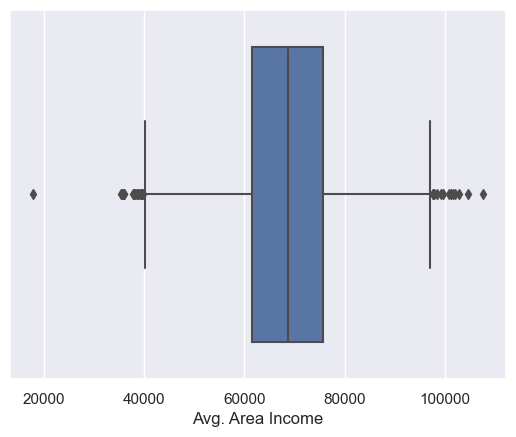

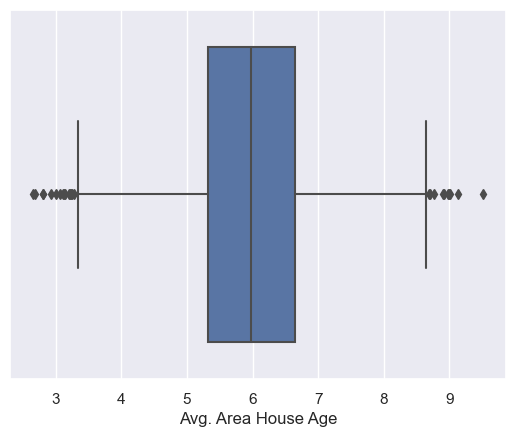

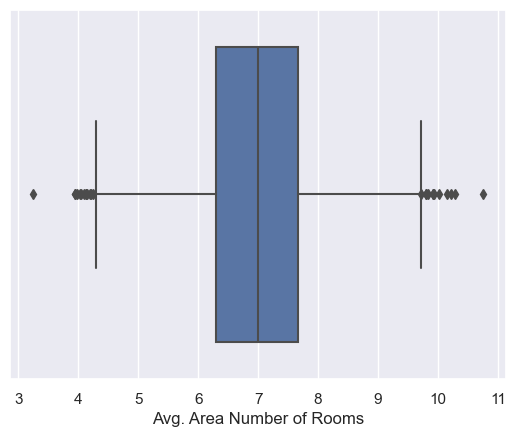

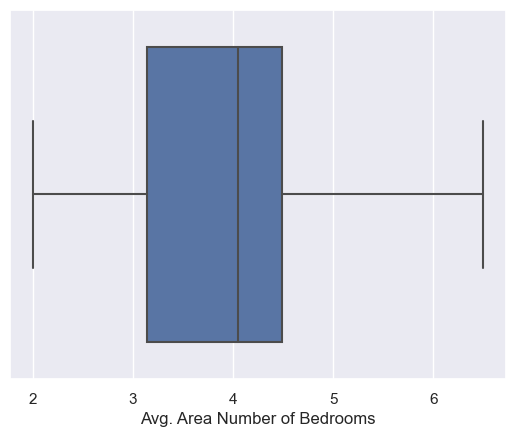

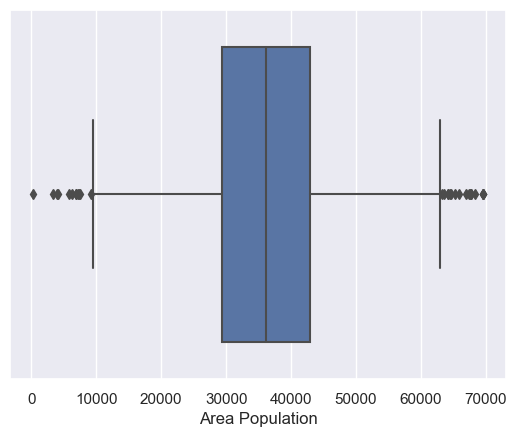

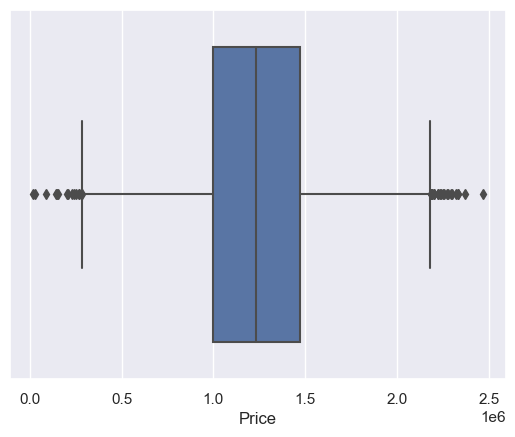

In [25]:
# check outlier
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

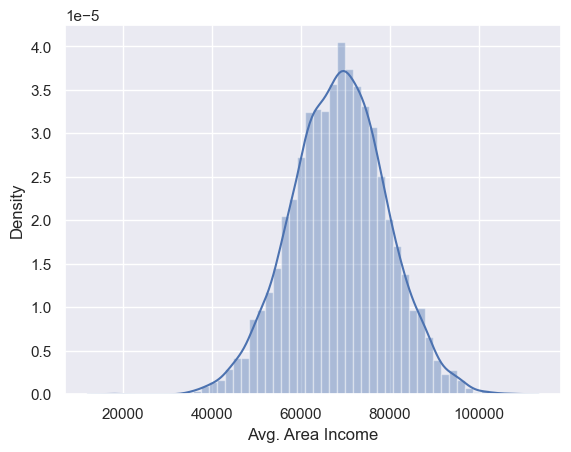

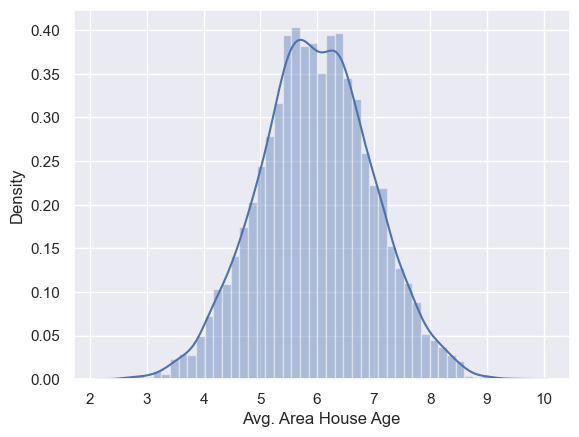

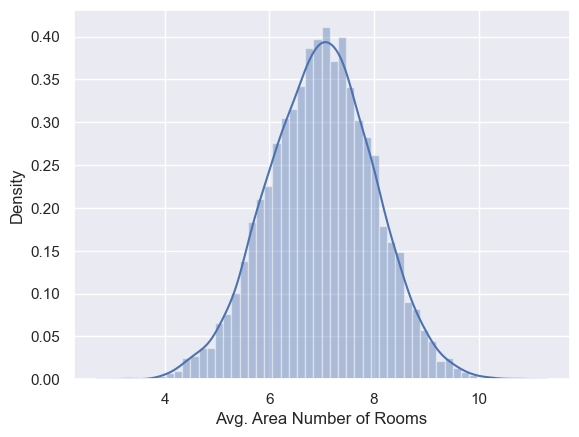

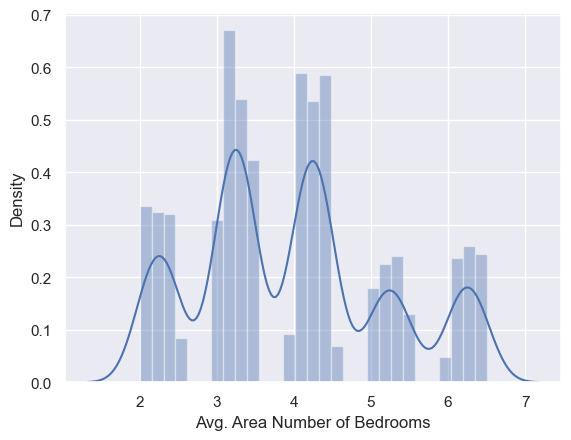

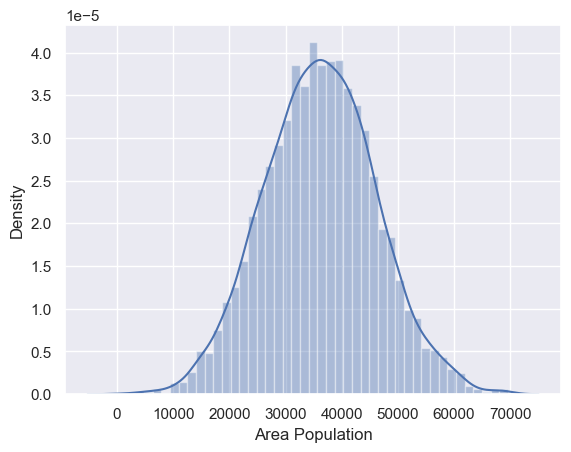

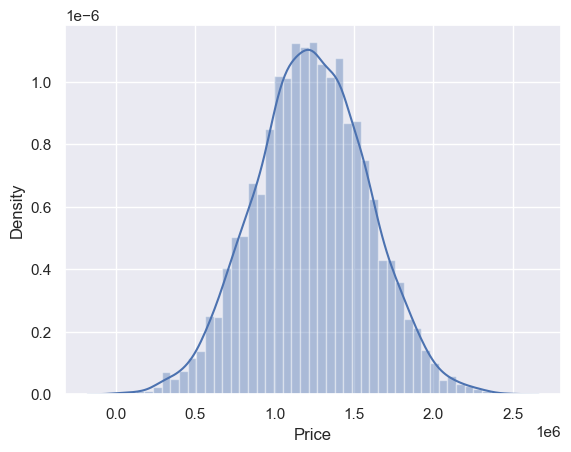

In [27]:
def distplots(col):
    sns.distplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    distplots(i)

In [26]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [ ]:
# Outlier Found - 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population'

In [28]:
income_Q1 = dataset['Avg. Area Income'].quantile(0.25)
income_Q3 = dataset['Avg. Area Income'].quantile(0.75)
income_iqr = income_Q3 - income_Q1

upper_income = income_Q3 + 1.5 * income_iqr
lower_income = income_Q1 - 1.5 * income_iqr

In [30]:
dataset['Avg. Area Income'] = np.where(dataset['Avg. Area Income'] > upper_income, upper_income,
                                       np.where(dataset['Avg. Area Income'] < lower_income, 
                                                lower_income, dataset['Avg. Area Income'] ))

In [31]:
age_Q1 = dataset['Avg. Area House Age'].quantile(0.25)
age_Q3 = dataset['Avg. Area House Age'].quantile(0.75)
age_iqr = age_Q3 - age_Q1

upper_age = age_Q3 + 1.5 * age_iqr
lower_age = age_Q1 - 1.5 * age_iqr

In [32]:
dataset['Avg. Area House Age'] = np.where(dataset['Avg. Area House Age'] > upper_age, upper_age,
                                       np.where(dataset['Avg. Area House Age'] < lower_age, 
                                                lower_age, dataset['Avg. Area House Age'] ))

In [34]:
room_Q1 = dataset['Avg. Area Number of Rooms'].quantile(0.25)
room_Q3 = dataset['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr = room_Q3 - room_Q1

upper_room = room_Q3 + 1.5 * room_iqr
lower_room = room_Q1 - 1.5 * room_iqr

In [35]:
dataset['Avg. Area Number of Rooms'] = np.where(dataset['Avg. Area Number of Rooms'] > upper_room,
                                                upper_room,
                                       np.where(dataset['Avg. Area Number of Rooms'] < lower_room, 
                                                lower_room, dataset['Avg. Area Number of Rooms'] ))

In [36]:
popl_Q1 = dataset['Area Population'].quantile(0.25)
popl_Q3 = dataset['Area Population'].quantile(0.75)
popl_iqr = popl_Q3 - popl_Q1

upper_popl = popl_Q3 + 1.5 * popl_iqr
lower_popl = popl_Q1 - 1.5 * popl_iqr

In [37]:
dataset['Area Population'] = np.where(dataset['Area Population'] > upper_popl,
                                                upper_popl,
                                       np.where(dataset['Area Population'] < lower_popl, 
                                                lower_popl, dataset['Area Population'] ))

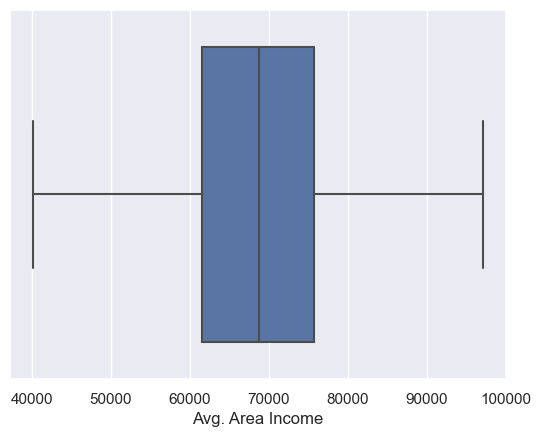

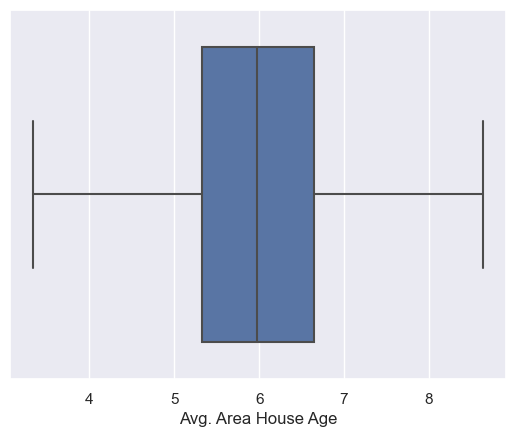

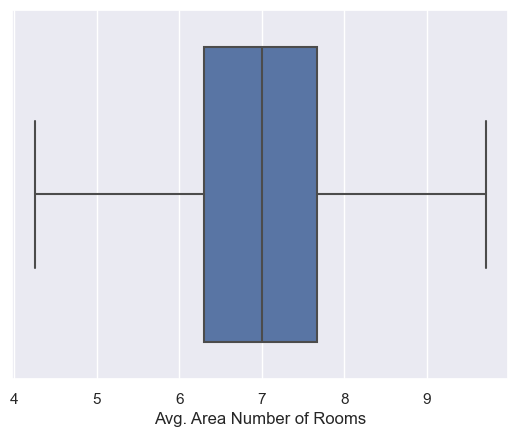

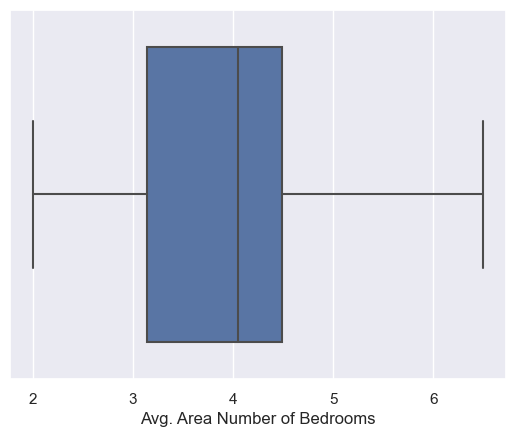

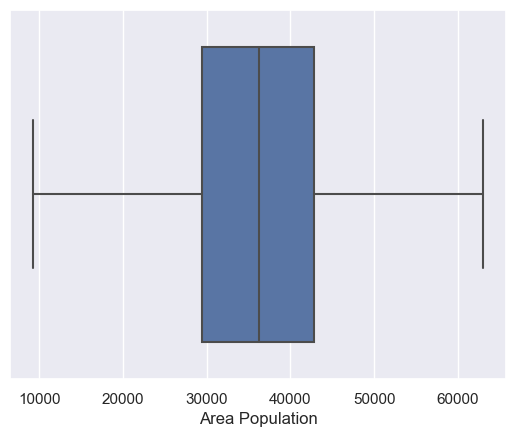

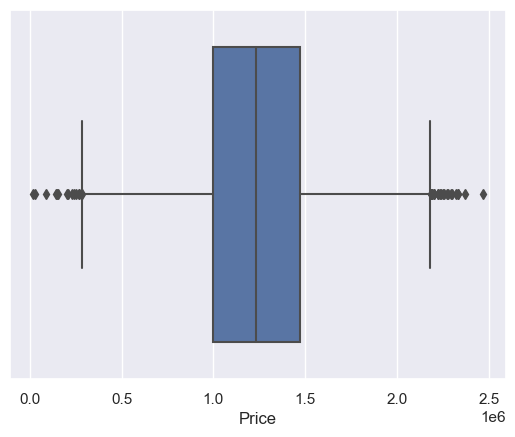

In [38]:
# check outlier
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# Preprocessing part 4 - Feature Scaling 

In [40]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68587.479539,5.977490,6.987540,3.981874,36159.070769,1.232073e+06
std,10574.362055,0.986995,1.001419,1.233756,9862.221143,3.531176e+05
min,40063.096827,3.329495,4.251308,2.000000,9217.885595,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,97188.572468,8.643597,9.713664,6.500000,63047.333875,2.469066e+06


### please note, when you use Gradient descent then 100% feature scaling is required
### For OLS, you have to check model is perfoming better with or without feature scaling and take action accordingly

In [41]:
# split the data into independent and dependent variable
x = dataset.drop(['Price'], axis=1)
y = dataset[['Price']]

In [42]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [43]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [48]:
pd.DataFrame(x_scaler).head()

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293


In [ ]:
# Preprocessing part
# 1) handling missing data - completed
# 2) handling encoding - completed
# 3) handling outlier - completed
# 4) feature scaling - completed
# 5) imbalance data - this is not applicable for linear regression

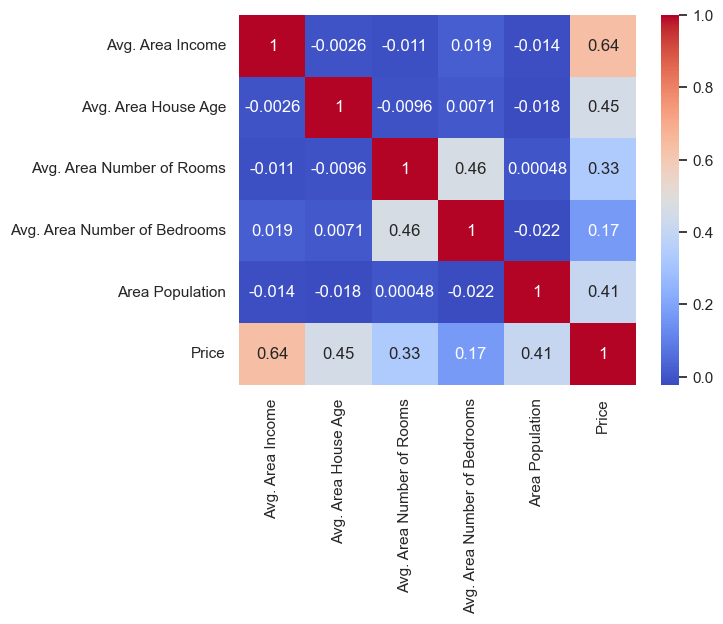

In [49]:
# Heat Map 

sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

# Variance Inflation Factor (VIF)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_scaler

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [52]:
vif

,Variance Inflation Factor,Features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population


In [54]:
# Check - Duplicate data 
dataset.duplicated().sum()

0

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Build OLS Model

In [59]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

In [60]:
regression_model = smf.OLS(endog=y_train, exog=x_train).fit()

In [61]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.865e+04
Date:                Sun, 16 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:46:35   Log-Likelihood:                         -48367.
No. Observations:                3500   AIC:                                  9.674e+04
Df Residuals:                    3495   BIC:                                  9.678e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1182      0.325     31.096      0.000       9.480      10.756
Avg. Area House Age           5.007e+04   3624.334     13.816      0.000     4.3e+04    5.72e+04
Avg. Area Number of Rooms    -9462.5755   3955.728     -2.392      0.017   -1.72e+04   -1706.805
Avg. Area Number of Bedrooms  3884.9989   3773.959      1.029      0.303   -3514.387    1.13e+04
Area Population                  8.4540      0.397     21.318      0.000       7.677       9.232
==============================================================================
Omnibus:                        0.414   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.467
Skew:                          -0.003   Prob(JB):                        0.792
Kurtosis:                       2.944   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#regression_model1 = smf.OLS(endog=y_test, exog=x_test).fit()

In [64]:
#regression_model1.summary()

In [65]:
# sklearn linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred_train =lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [67]:
# evaluate the model
from sklearn.metrics import r2_score

In [68]:
print("Training Accuracy ", r2_score(y_train, y_pred_train))
print("****************"*10)
print("Test Accuracy ", r2_score(y_test, y_pred_test))

Training Accuracy  0.915838657450251
****************************************************************************************************************************************************************
Test Accuracy  0.9156697910198243


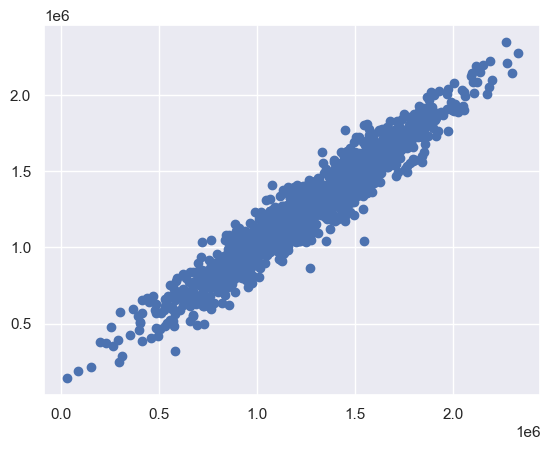

In [69]:
# Linearity
plt.scatter(y_test, y_pred_test)

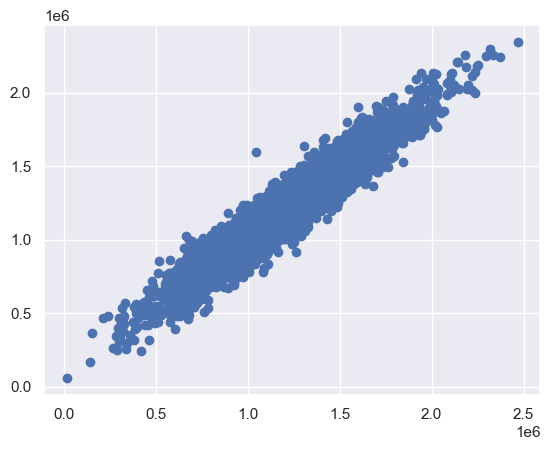

In [70]:
plt.scatter(y_train, y_pred_train)

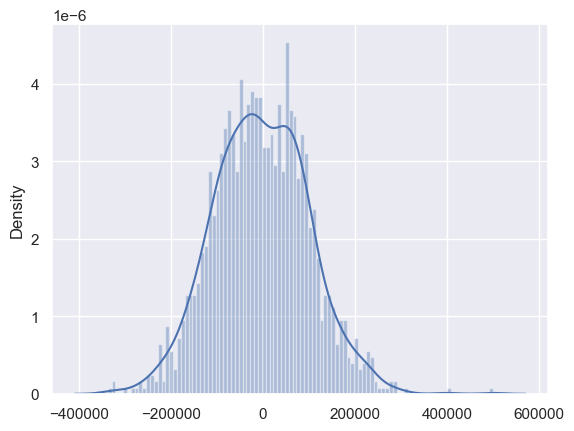

In [75]:
# Residual - normality

sns.distplot((y_test - y_pred_test), bins=100)

plt.show()

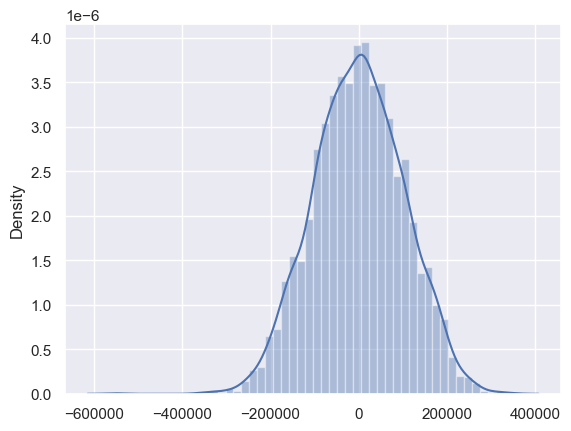

In [74]:
sns.distplot((y_train - y_pred_train), bins=50)

plt.show()

In [ ]:
# Conclude :

# part 1 : R-Square and Adj-R-Square - satisfied
# part 2 - p_value - satisfied (please drop bedroom and try)
# part 3 - assumption :
    # a) no autocorrelation found - satisfied
    # b ) no multicollinearity found - satisfied
    # c) homoscediscity - satisfied (outlier treatement done)
    # d) normality of residual - satisfied
    # e) linearity relation with action dv vs pred dv - satisfied
    # f) no endogenity - satisfied (as taken right dv - price)